In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/AirPassengers.csv')

# Display the first few rows of the dataset
print(df.head())

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [2]:
# Convert the 'Month' column to datetime
df['Month'] = pd.to_datetime(df['Month'])

# Set 'Month' as the index
df.set_index('Month', inplace=True)

# Display the first few rows of the dataset
print(df.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


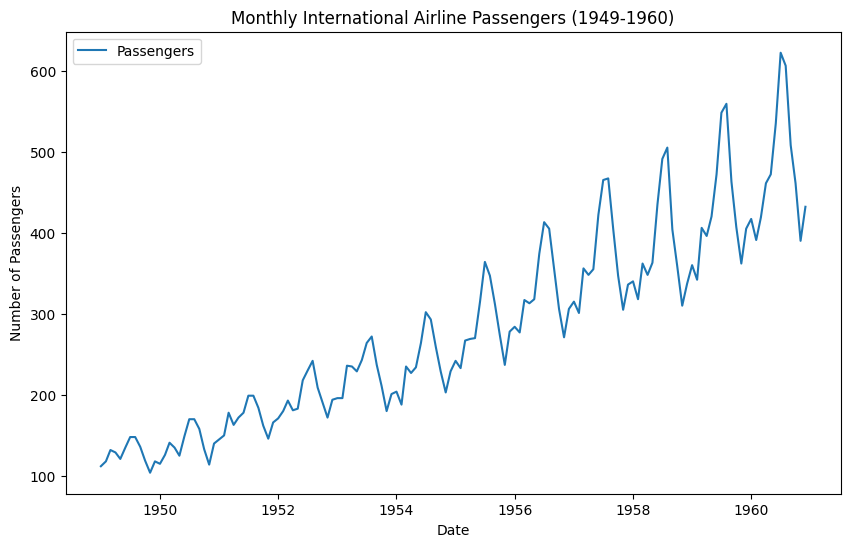

In [3]:
import matplotlib.pyplot as plt

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['#Passengers'], label='Passengers')
plt.title('Monthly International Airline Passengers (1949-1960)')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

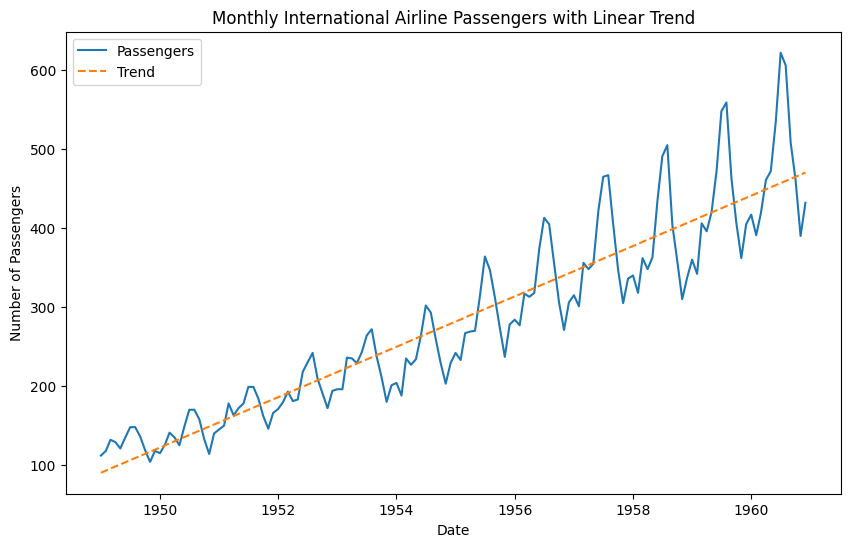

In [4]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Create a time variable
df['Time'] = np.arange(len(df))

# Define the independent variable (Time) and dependent variable (Passengers)
X = df[['Time']]
y = df['#Passengers']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the trend
df['Trend'] = model.predict(X)

# original data vs fitted trend
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['#Passengers'], label='Passengers')
plt.plot(df.index, df['Trend'], label='Trend', linestyle='--')
plt.title('Monthly International Airline Passengers with Linear Trend')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [5]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y, df['Trend'])
print(f'R-squared: {r2:.2f}')

R-squared: 0.85
